In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import numpy as np
from ALP4 import *
import time

import matplotlib.pyplot as plt

In [14]:
# Load the Vialux .dll
DMD = ALP4(version = '4.3', libDir=r"C:\Program Files\ALP-4.3\ALP-4.3 API")
# Initialize the device
DMD.Initialize()

Loading library: C:\Program Files\ALP-4.3\ALP-4.3 API/x64/alp4395.dll
DMD found, resolution = 1024 x 768.


In [10]:
# Binary amplitude image (0 or 1)
bitDepth = 1    
imgBlack = np.zeros([DMD.nSizeY,DMD.nSizeX])
imgWhite = np.ones([DMD.nSizeY,DMD.nSizeX])*(2**8-1)
imgSeq  = np.concatenate([imgBlack.ravel(),imgWhite.ravel()])

# Allocate the onboard memory for the image sequence
DMD.SeqAlloc(nbImg = 2, bitDepth = bitDepth)
# Send the image sequence as a 1D list/array/numpy array
DMD.SeqPut(imgData = imgSeq)
# Set image rate to 50 Hz
DMD.SetTiming(pictureTime = 20000)

# Run the sequence in an infinite loop
DMD.Run()

time.sleep(10)



KeyboardInterrupt: 

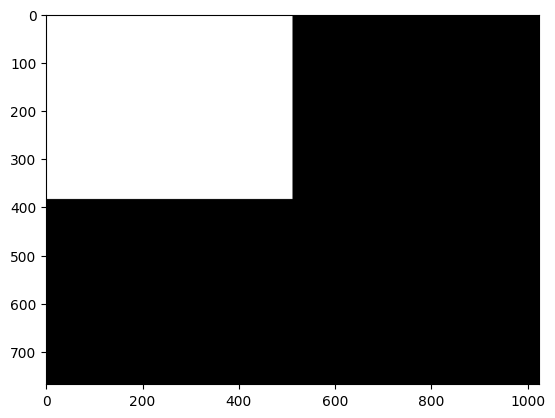

In [20]:
img = np.zeros([DMD.nSizeY,DMD.nSizeX])
img[:DMD.nSizeY//2, :DMD.nSizeX//2] = 1
img = img * (2**8-1)

plt.imshow(img, cmap='gray')

# Allocate the onboard memory for the image sequence
DMD.SeqAlloc(nbImg = 1, bitDepth = bitDepth)

# Send the image sequence as a 1D list/array/numpy array
DMD.SeqPut(imgData = img)

# Set image rate to 50 Hz
DMD.SetTiming(pictureTime = 20000)

# Run the sequence in an infinite loop
DMD.Run()

# time.sleep(1)

In [ ]:
# Binary amplitude image (0 or 1)
bitDepth = 1    
imgBlack = np.zeros([DMD.nSizeY,DMD.nSizeX])
imgWhite = np.ones([DMD.nSizeY,DMD.nSizeX])*(2**8-1)
imgSeq  = np.concatenate([imgBlack.ravel(),imgWhite.ravel()])

# Allocate the onboard memory for the image sequence
DMD.SeqAlloc(nbImg = 2, bitDepth = bitDepth)
# Send the image sequence as a 1D list/array/numpy array
DMD.SeqPut(imgData = imgSeq)
# Set image rate to 50 Hz
DMD.SetTiming(pictureTime = 20000)

# Run the sequence in an infinite loop
DMD.Run()

time.sleep(10)


In [21]:
# Stop the sequence display
DMD.Halt()


In [22]:
# Free the sequence from the onboard memory
DMD.FreeSeq()
# De-allocate the device
DMD.Free()